<div style="text-align: center;">

# Получение предсказаний по удою и вкусу молока при помощи машинного обучения.

</div>

## О проекте:

### Описание исследования:

**В ходе исследования необходимо построить качественные модели линейной и логической регрессий, с целью предсказания целевых показателей для коров, которые находятся на продажу.**

**Целевыми показателями в данном исследовании выступают удой (линейная регрессия) и вкус молока (логическая ргерессия)**

### Цель исследования:

**Определить список коров, удой у которых составит более 6000 кг. молока/год и чье молоко окажется вкусным(на взгляд фермера)**

### Задачи исследования:

1. **Загрузка и знакомство с данными:**
   
   1.1. *Загрузить данные.* 
   
   1.2. *Переименновать столбцы.*
   

2. **Предобработать данные:**

   2.1. *Проверить данные на дубликаты/пропуски.*
   
   2.2. *Привести значения столбцов в необходимые форматы.*
   

3. **Исследовать данные. Узанть тип распределения и проверить на наличие выбросов:**
  
   3.1. *Данные магазина.*
   
   3.2. *Данные фермера.*
   

4. **Провести корреляционный анализ:**

   4.1. *Провести анализ корреляции между показателями.*
   
   4.2. *Провести анализ распределения независимых показателей и целевого*    
   
 
5. **Обучение модели линейной регрессии:**

   5.1. *Обучить модель линейной регрессии.*
   
   5.2. *Сделать прогноз по удою молока.*
   

6. **Обучение модели логической регрессии:**

   6.1. *Обучить модель логической регрессии.*
   
   6.2. *Сделать прогноз относительно вкуса молока.*
   

7. **Итоговые выводы:**

   7.1. *Найти список коров, целевые показатели которых соответствуют цели исследования*
   
   7.2. *Сделать итоговые выводы о проделанной работе* 

### Исходные данные:

**Исходными данными являются 3 датасета с данными:**
  1. **О текущем стаде фермера:** *содержит информацию о рационе коров, породе, породе отца, типу местности(на котором пасется), возрасте и т.д.*
  
  2. **Об имени отца для каждой коровы в стаде:** *содержит имя отца для каждой коровы*
  
  3. **Данные магазина:** *содержит информацию о текущих коровах, доступных к покупке* 

## 1. Загрузка и знакомство с данными:

### 1.1 Загрузка данных:

In [2]:
#Импортируем и предустановим все библиотеки, используемые в проекте.
!pip install phik -q


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import (r2_score,confusion_matrix, classification_report, mean_squared_error,
                            mean_absolute_error,accuracy_score, recall_score, precision_score) 

import numpy as np


In [4]:
plt.rcParams["figure.figsize"] = (10,10)

In [5]:
shop = pd.read_csv('cow_buy.csv', sep=';')
dad = pd.read_csv('ferma_dad.csv', sep = ';')
main = pd.read_csv('ferma_main.csv', sep = ';')

### 1.2 Переименование столбцов:

In [6]:
shop.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [7]:
shop_name = {'Порода':'порода','Тип пастбища':'пастбище', 'порода папы_быка':'порода_папы', 'Имя_папы':'имя_папы',
             'Текущая_жирность,%':'жирность','Текущий_уровень_белок,%':'белок', 'Возраст':'возраст'}

In [8]:
shop.rename(columns=shop_name, inplace=True)

In [9]:
dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [11]:
main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [12]:
main_name = {'Удой, кг':'удой', 'ЭКЕ (Энергетическая кормовая единица)':'ЭКЕ', 'Сырой протеин, г':'сырой_протеин',
            'СПО (Сахаро-протеиновое соотношение)':'СПО', 'Порода':'порода', 'Тип пастбища':'пастбище',
            'порода папы_быка':'порода_папы','Жирность,%':'жирность', 'Белок,%':'белок',
            'Вкус молока':'вкус_молока', 'Возраст':'возраст'}

In [13]:
main.rename(columns=main_name, inplace=True)

In [14]:
ferma = pd.merge(main, dad, on='id', how='left')

In [15]:
ferma.rename(columns={'Имя Папы': "имя_папы"}, inplace=True)

In [16]:
ferma['пастбище'] = ferma['пастбище'].str.lower()

In [17]:
ferma['пастбище']=ferma['пастбище'].replace('равнинные', "равнинное")

### Вывод по части №1

**1. Данные были загружены.** 
  
  **2. Названия столбцов в разных датафреймах приведены к идентичным. Информацию о расшифровке аббревиатур и единицах измерения лучше вывести в документацию к файлу.**
  
  **3. Объеденены дф с информацией о текущем стаде фермера (ferma)**

##  2. Предобработка данных

### 2.1 Проверка на дубликаты:

**Проверка на дубликаты. Удаление дубликатов**

In [18]:
print(ferma.duplicated().sum())
print(shop.duplicated().sum())

5
4


In [19]:
ferma = ferma.drop_duplicates().reset_index(drop=True)
#shop = shop.drop_duplicates().reset_index(drop=True)

### 2.2 Приведение столбцов к корректным форматам:

**Приведение типов данных в дф "shop" к корректным**

In [20]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   порода       20 non-null     object
 1   пастбище     20 non-null     object
 2   порода_папы  20 non-null     object
 3   имя_папы     20 non-null     object
 4   жирность     20 non-null     object
 5   белок        20 non-null     object
 6   возраст      20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [21]:
col_float = ['жирность', 'белок']
shop[col_float] = shop[col_float].replace(',', '.', regex=True).astype(float)


In [22]:
shop.head()

,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Приведение типов данных в дф "ferma" к корректным**

In [23]:
ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             629 non-null    int64 
 1   удой           629 non-null    int64 
 2   ЭКЕ            629 non-null    object
 3   сырой_протеин  629 non-null    int64 
 4   СПО            629 non-null    object
 5   порода         629 non-null    object
 6   пастбище       629 non-null    object
 7   порода_папы    629 non-null    object
 8   жирность       629 non-null    object
 9   белок          629 non-null    object
 10  вкус_молока    629 non-null    object
 11  возраст        629 non-null    object
 12  имя_папы       629 non-null    object
dtypes: int64(3), object(10)
memory usage: 64.0+ KB


In [24]:
float_col = ['ЭКЕ','СПО','жирность','белок']

In [25]:
ferma[float_col] = ferma[float_col].replace(',', '.', regex=True).astype(float)

In [26]:
ferma.head()

,id,удой,ЭКЕ,сырой_протеин,СПО,порода,пастбище,порода_папы,жирность,белок,вкус_молока,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


### Вывод по части №2:

**1. В данных обнаружены дубликаты, которые впоследствии были удалены**

**2. Типы данных в наборах приведены к корректным (строковые в числа с плавающей точкой)**

## 3. Исследовательский анализ данных:

### 3.1 Данные магазина 

#### 3.1.1 Анализ количественных показателей

In [26]:
shop.describe()

,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


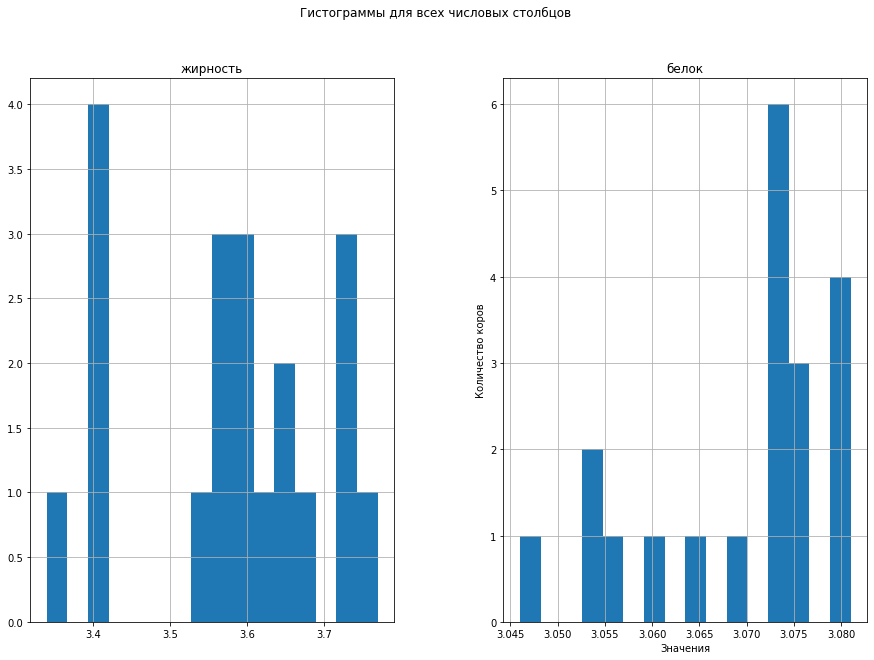

In [27]:


shop.hist(bins=16, figsize=(15, 10), grid=True)

plt.suptitle('Гистограммы для всех числовых столбцов')
plt.xlabel('Значения')
plt.ylabel('Количество коров')

plt.show()

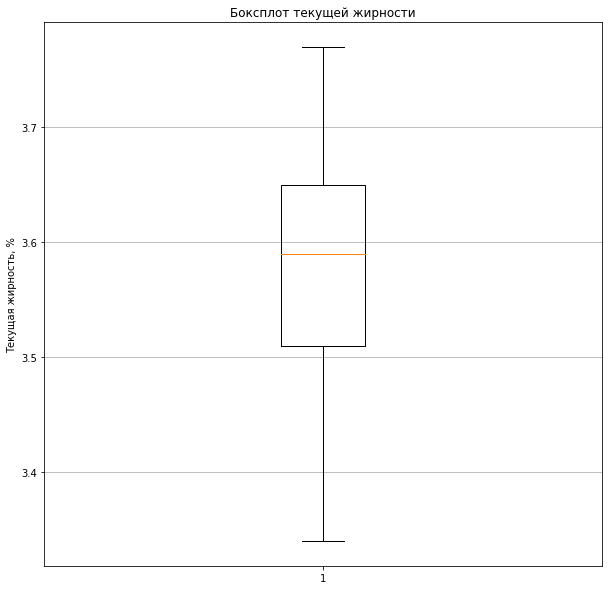

In [28]:
plt.boxplot(shop['жирность'], flierprops=dict(marker='o', color='blue', markersize=8))
plt.title('Боксплот текущей жирности')
plt.ylabel('Текущая жирность, %')
plt.grid(axis='y')
plt.show()


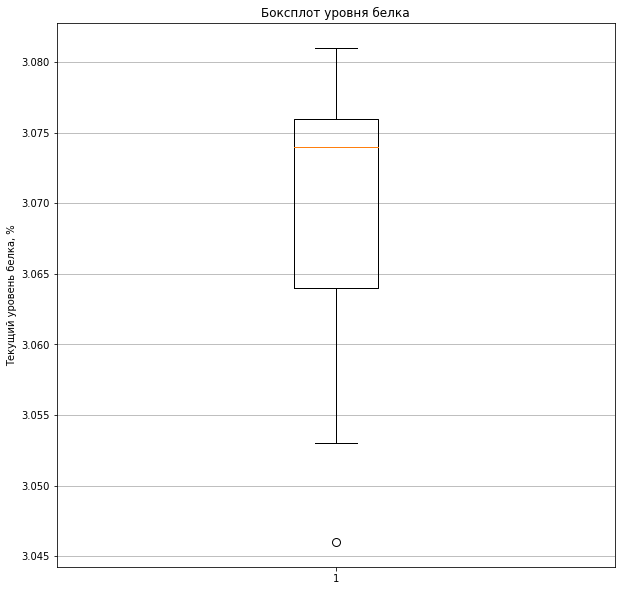

In [29]:

plt.boxplot(shop['белок'], flierprops=dict(marker='o', color='blue', markersize=8))
plt.title('Боксплот уровня белка')
plt.ylabel('Текущий уровень белка, %')
plt.grid(axis='y')
plt.show()

#### 3.1.2 Анализ качественных показателей

In [30]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   порода       20 non-null     object 
 1   пастбище     20 non-null     object 
 2   порода_папы  20 non-null     object 
 3   имя_папы     20 non-null     object 
 4   жирность     20 non-null     float64
 5   белок        20 non-null     float64
 6   возраст      20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [31]:
shop_qualitive = ['порода', 'пастбище', 'порода_папы', 'имя_папы', 'возраст']

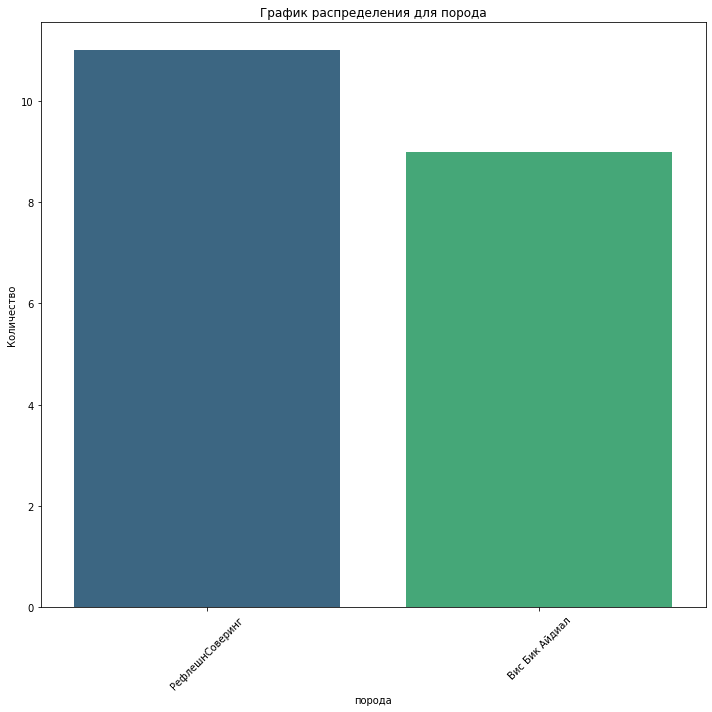

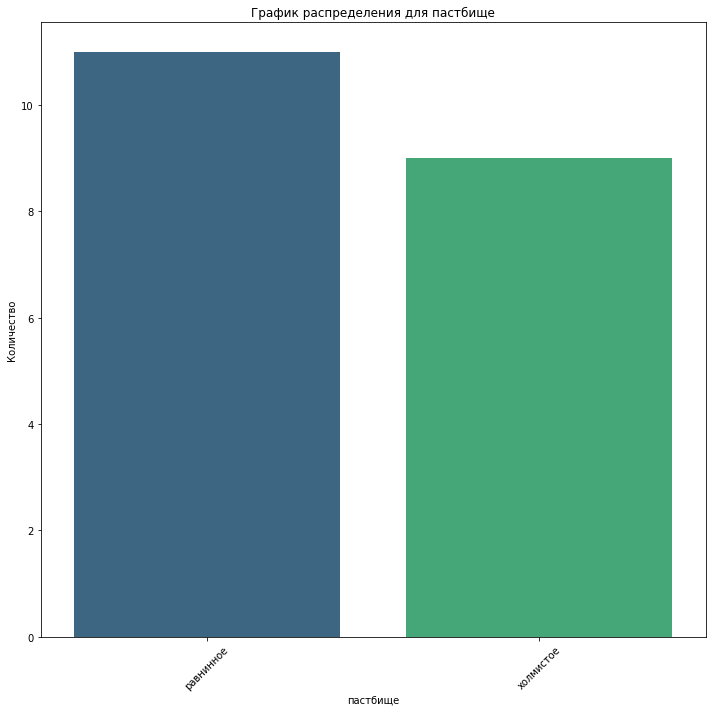

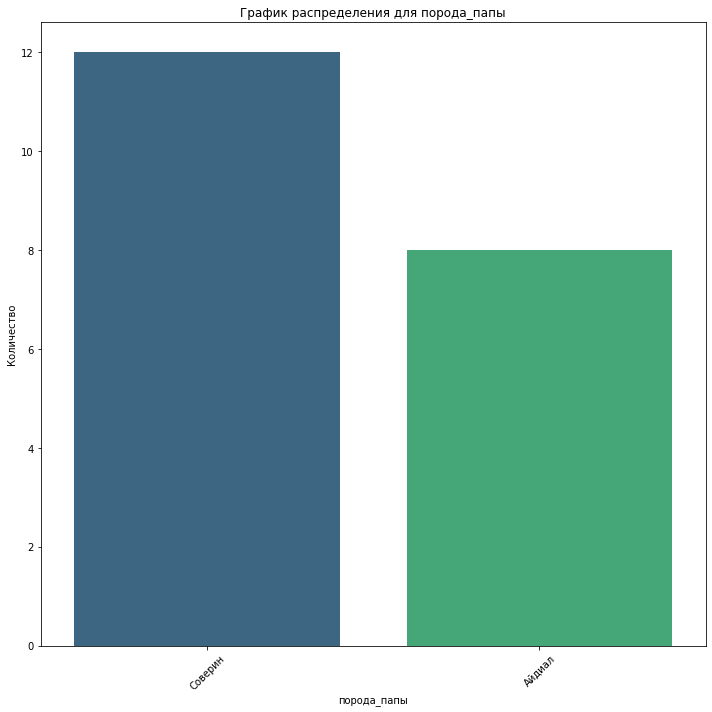

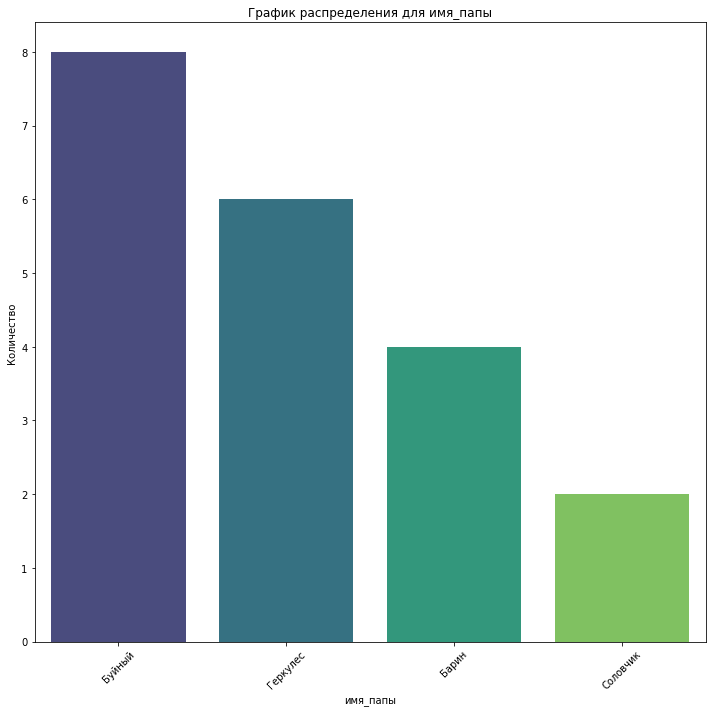

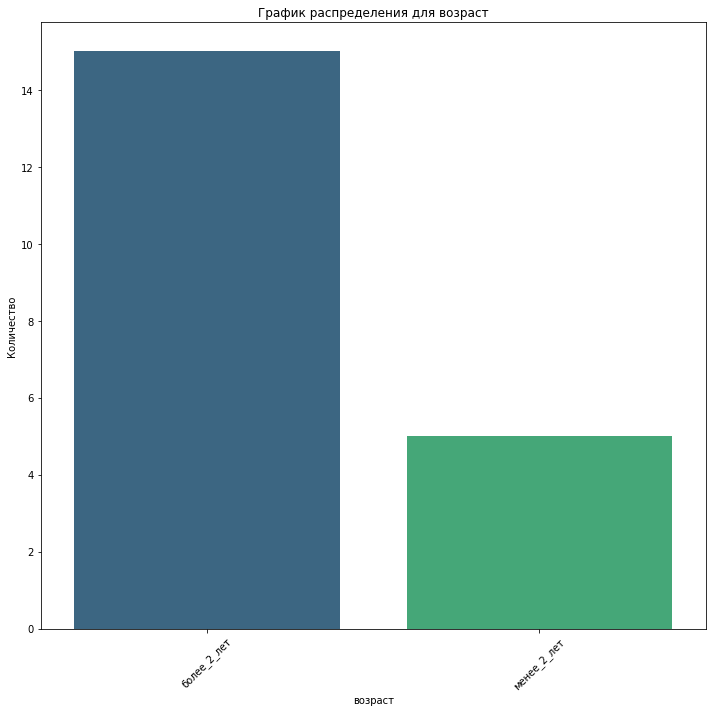

In [32]:
for column in shop_qualitive:
    sns.countplot(data=shop, x=column, order=shop[column].value_counts().index, palette='viridis')
    plt.title(f'График распределения для {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()  

#### Выводы по данным магазина:


**1. В данных отсутствуют значительные выбросы.**

**2. Данные распределенны бимодально с двумя горбами в левой и правой частях.**

**3. Основную массу коров на продажу составляют потомки "Буйного" и "Геркулеса"**

**4. Большинство коров (11 из 16) старше двух лет.**

### 3.2 Данные фермера

#### 3.2.1 Анализ количественных показателей

In [33]:
ferma.describe()

,id,удой,ЭКЕ,сырой_протеин,СПО,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [34]:
ferma_num = ferma.drop('id', axis=1)

In [35]:
#применим правило Стёрджеса для подбора количества столбцов.
quantity = ferma_num.shape[0]
bins = int(np.log2(quantity) + 1)
ferma_num.columns

Index(['удой', 'ЭКЕ', 'сырой_протеин', 'СПО', 'порода', 'пастбище',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст',
       'имя_папы'],
      dtype='object')

In [36]:
ferma_num = ferma_num.select_dtypes(include=[np.number])

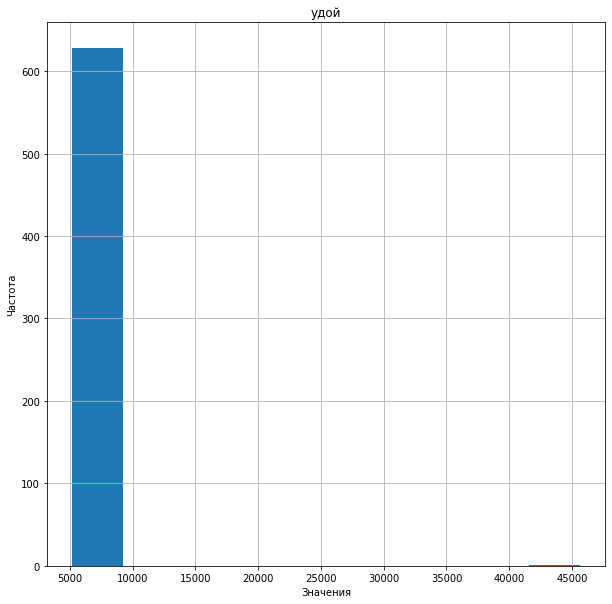

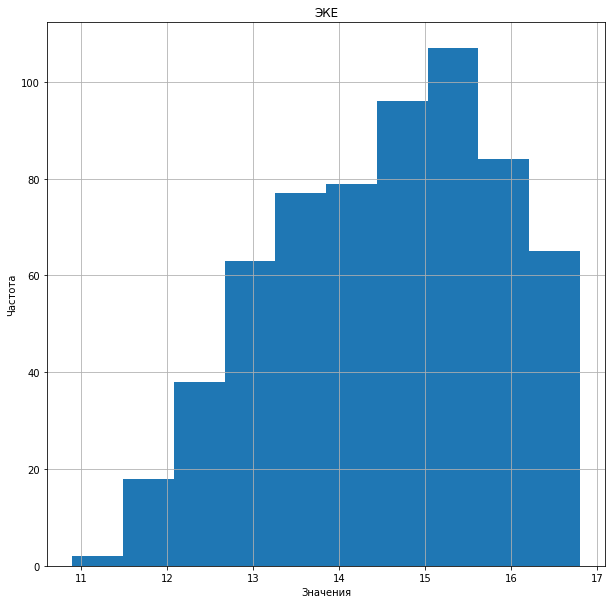

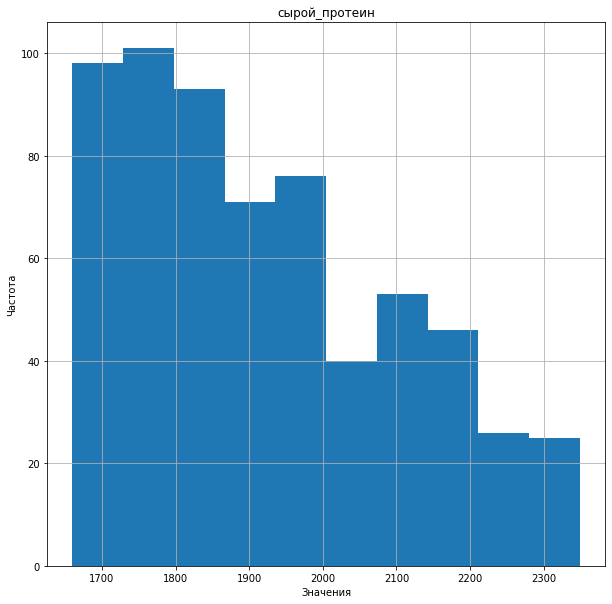

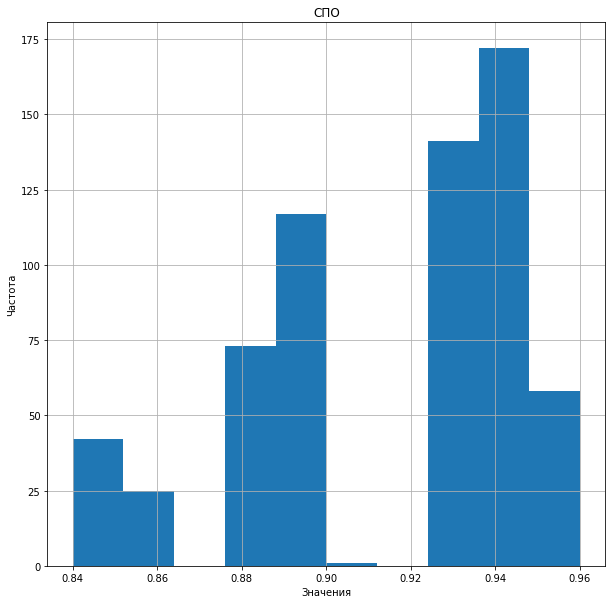

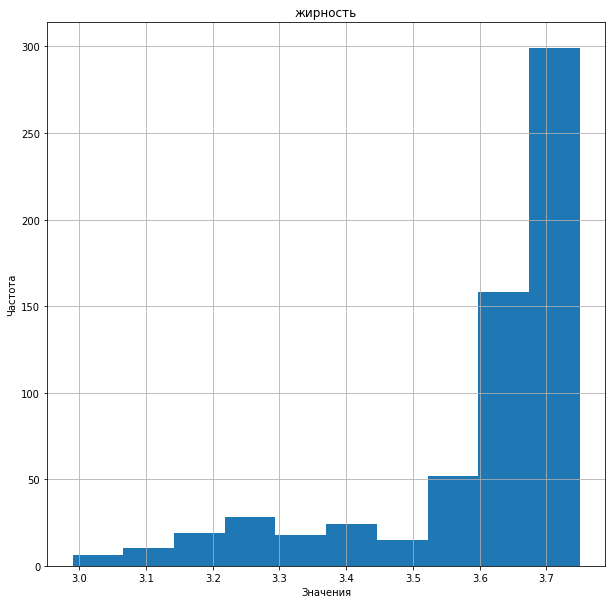

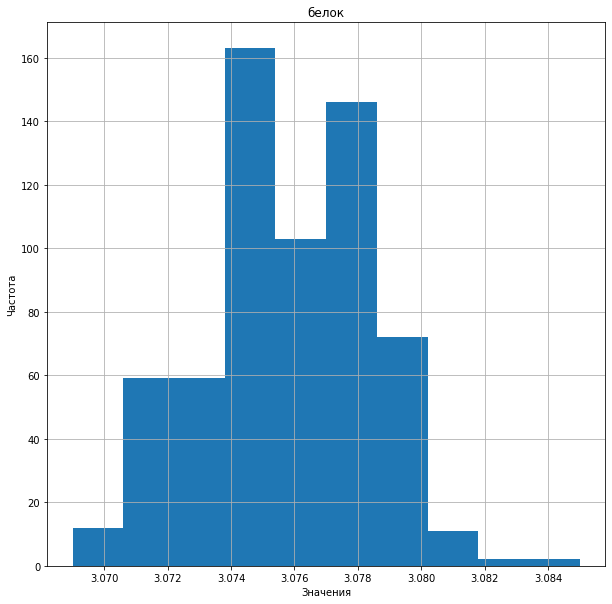

In [37]:
for i in ferma_num.columns:
    ferma_num[i].hist(bins=10, grid = True)
    plt.title(i)
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.show()
    


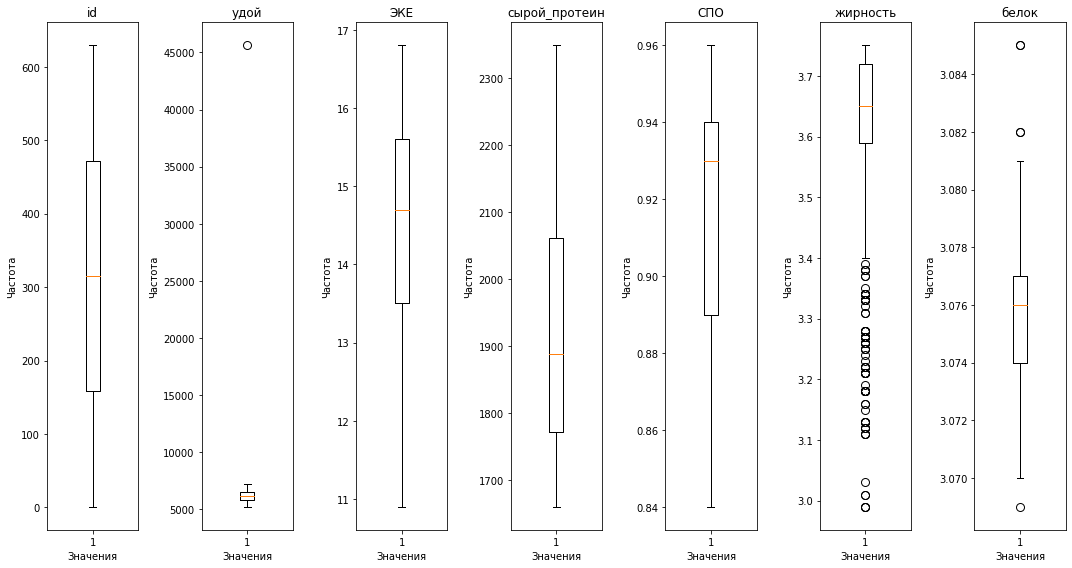

In [38]:
numeric_columns = ferma.select_dtypes(include='number')


plt.figure(figsize=(15, 8))


for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(1, len(numeric_columns.columns), i)  
    plt.boxplot(numeric_columns[column], flierprops=dict(marker='o', color='red', markersize=8))
    plt.title(column)
    plt.xlabel('Значения')
    plt.ylabel('Частота')


plt.tight_layout()
plt.show()


In [39]:
check_udoi = ferma.query('удой > 10000')
check_udoi

,id,удой,ЭКЕ,сырой_протеин,СПО,порода,пастбище,порода_папы,жирность,белок,вкус_молока,возраст,имя_папы
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет,Буйный


In [40]:
#Показатель по удою явно ошибочный. Удалим данную строку из дф.
#Показатели по жирности и белку оставим без изменений. Данные могут быть реальными.
ferma=ferma.query('удой < 10000')

#### 3.2.2 Анализ качественных показателей

In [41]:
ferma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             628 non-null    int64  
 1   удой           628 non-null    int64  
 2   ЭКЕ            628 non-null    float64
 3   сырой_протеин  628 non-null    int64  
 4   СПО            628 non-null    float64
 5   порода         628 non-null    object 
 6   пастбище       628 non-null    object 
 7   порода_папы    628 non-null    object 
 8   жирность       628 non-null    float64
 9   белок          628 non-null    float64
 10  вкус_молока    628 non-null    object 
 11  возраст        628 non-null    object 
 12  имя_папы       628 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.7+ KB


In [42]:
ferma_qualitive = ['порода','пастбище', 'порода_папы', 'возраст', 'имя_папы']

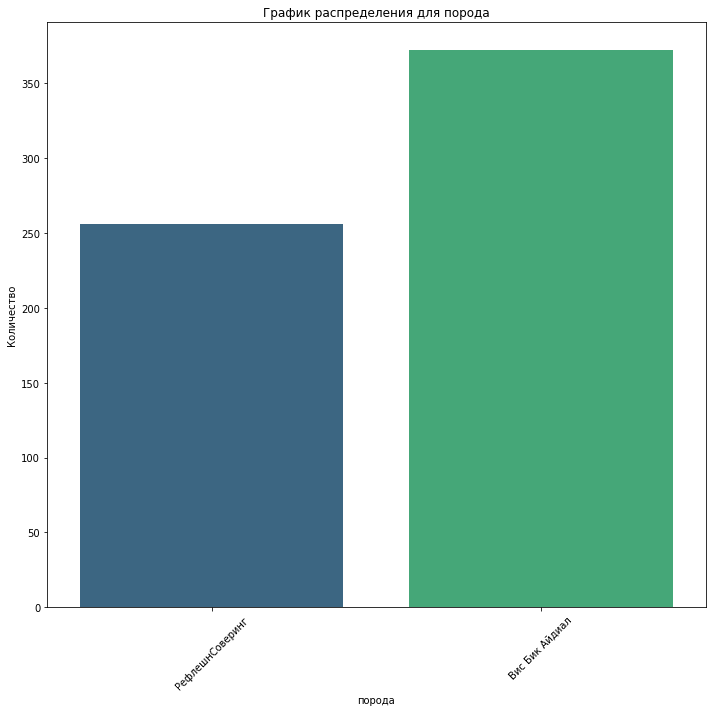

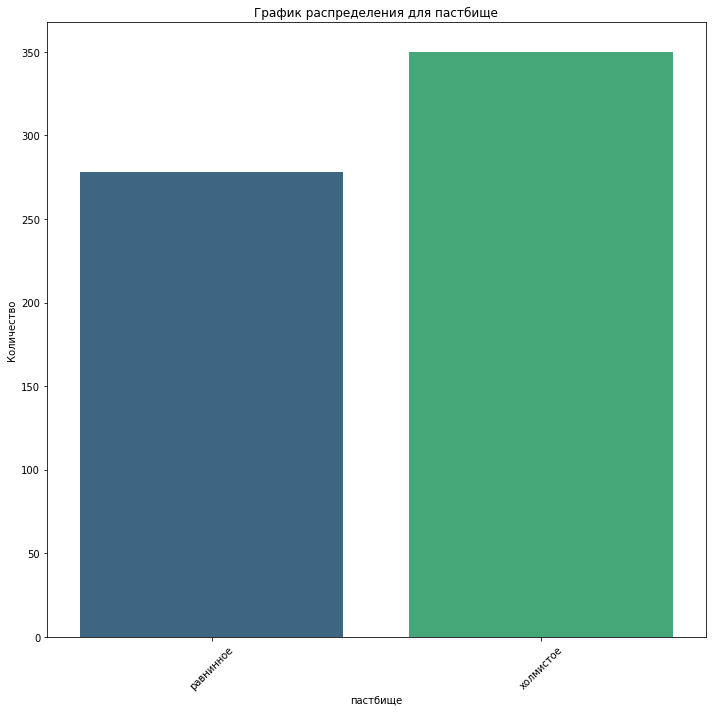

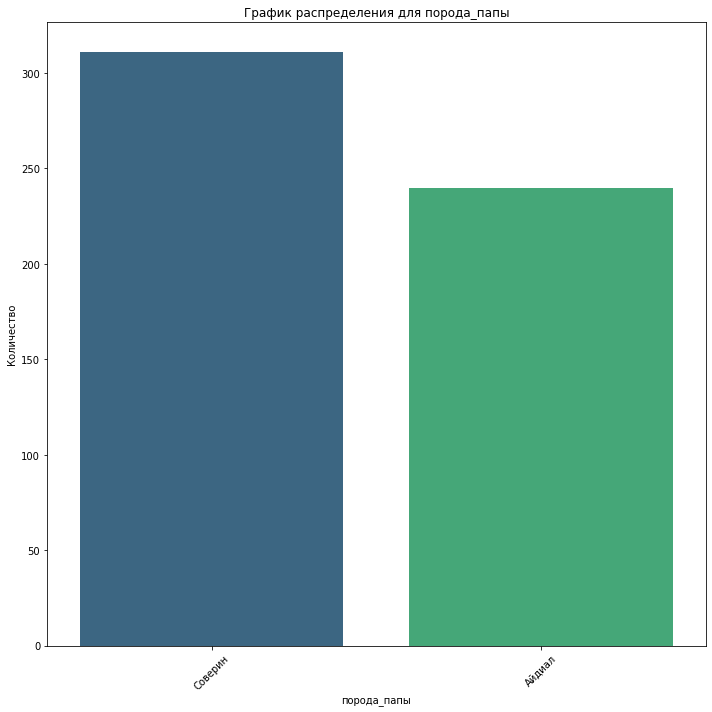

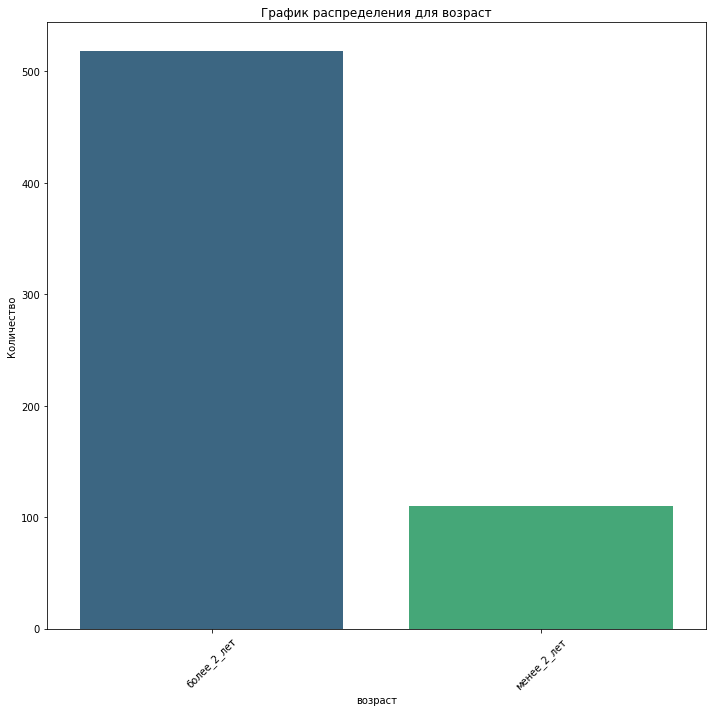

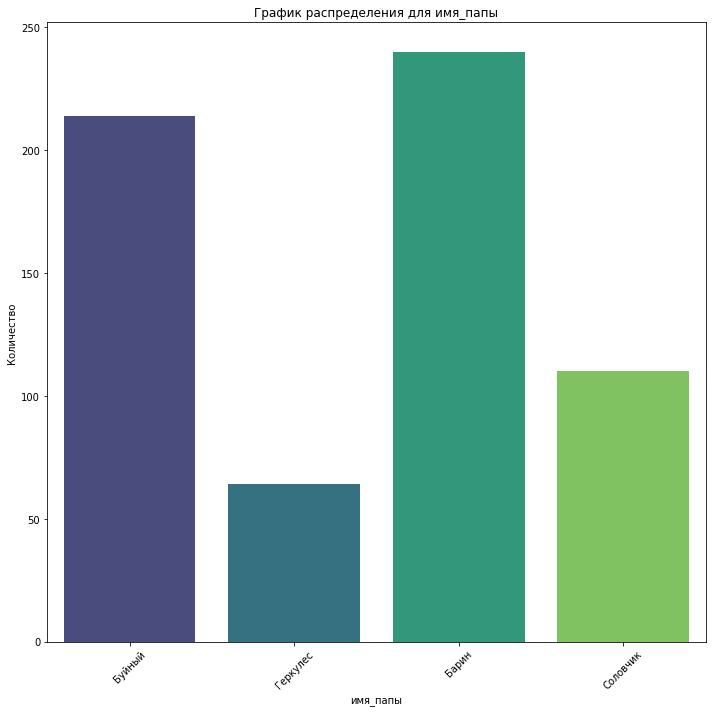

In [43]:
for column in ferma_qualitive:
    sns.countplot(data=ferma, x=column, order=shop[column].value_counts().index, palette='viridis')
    plt.title(f'График распределения для {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()

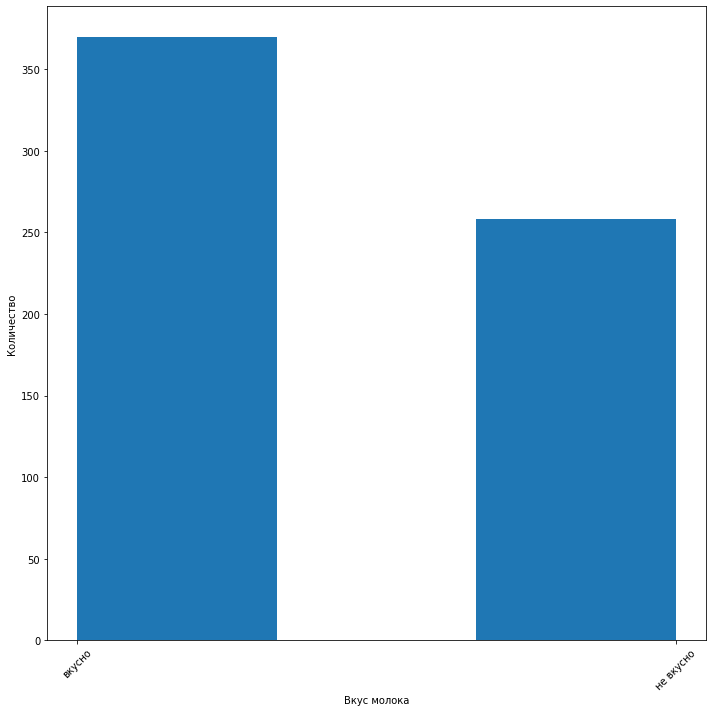

In [44]:

plt.hist(data=ferma, x='вкус_молока', bins=3)
plt.xlabel("Вкус молока")
plt.ylabel('Количество')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [45]:
delicious = ferma[ferma['вкус_молока'] == "вкусно"].count()
print(delicious/ferma.count()*100)

id               58.917197
удой             58.917197
ЭКЕ              58.917197
сырой_протеин    58.917197
СПО              58.917197
порода           58.917197
пастбище         58.917197
порода_папы      58.917197
жирность         58.917197
белок            58.917197
вкус_молока      58.917197
возраст          58.917197
имя_папы         58.917197
dtype: float64


#### Вывод по данным фермера: 
**1.Данные распределены ненормально**

**2.Присутствовал значительный выброс по удою (был удален), остальные выбросы незначительны (были оставлены)**

**3.На текущий момент только 59% молока нравится фермеру**

**4.В стаде преобладают потомки "Буйного" и "Барина". Самую незначительную долю занимют потомки "Геркулеса". На продаже в текущий момент преобладают потомки "Буйного" и "Геркулеса".**

**5. Большинство стада, как и в данных магазина, старше двух лет**


## 4. Корреляционный анализ

### 4.1 Анализ корреляции

In [46]:
ferma_backup = ferma.copy() #резервная копия

In [47]:
ferma = ferma.drop('id', axis=1)

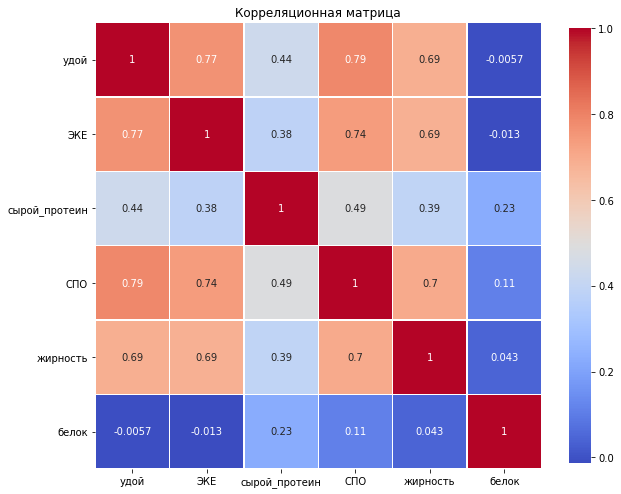

In [48]:
#Учитывая, что данные распределены не нормально, применем корреляцию Спирмена
correlation = ferma.corr(method='spearman')
plt.figure(figsize=(10,10))

sns.heatmap(correlation, annot=True, cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)


plt.title('Корреляционная матрица')


plt.show()

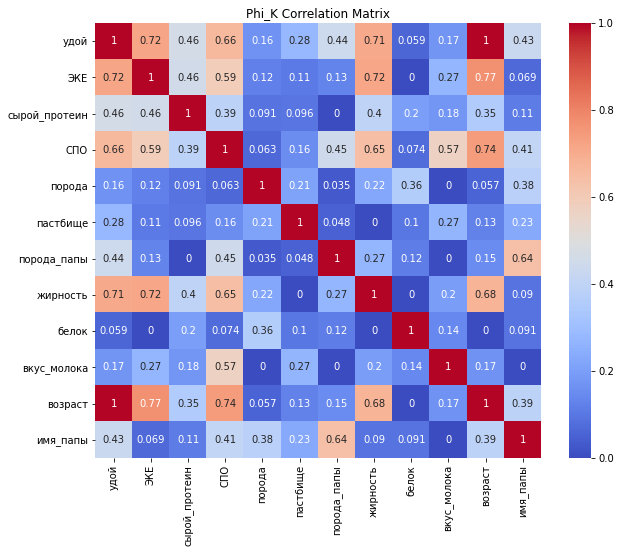

In [49]:
interval_cols = ferma.select_dtypes(include=['int64', 'float64']).columns.tolist()
phik_cor = ferma.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(10, 8))
sns.heatmap(phik_cor, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

### Вывод по матрциам корреляции:

**1. Исходя из матрицы корреляции количественных показателей видно, что существует связь между удоем и СПО, ЭКЕ и жирностью**

**2. Исходя из матрицы Phi_K видно, что связь между этими показателями не линейная, а с СПО, в принципе отсутствует**

**3. Необходимо посмотреть диаграммы рассеивания с каждым из трех признаков и попытаться улучшить данные** 

### 4.2 Зависимость  показателей с целевыми 

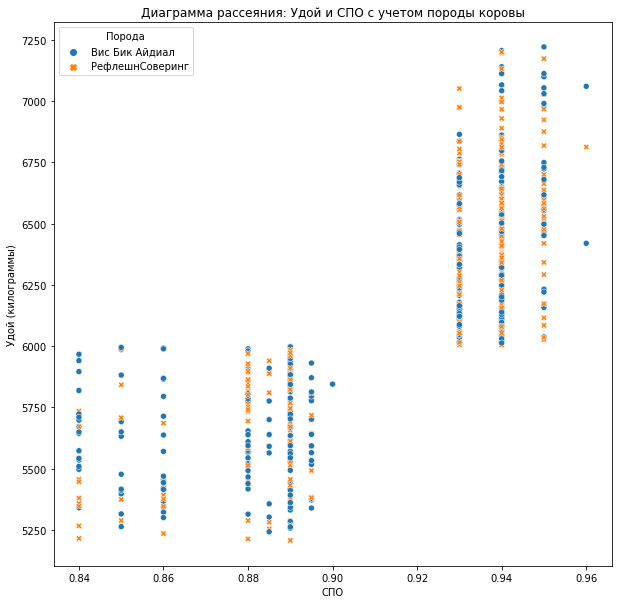

In [50]:
sns.scatterplot(data=ferma, x='СПО', y='удой', hue='порода', style='порода')
plt.title('Диаграмма рассеяния: Удой и СПО с учетом породы коровы')
plt.xlabel('СПО')
plt.ylabel('Удой (килограммы)')
plt.legend(title='Порода') 
plt.show()

In [51]:
#Наблюдаются две четкие группы до 0,9 и после 0,92.
#Приведем показатель СПО к бинарному, где позатель выше 0,92 = 1, а показатель ниже = 0
def binary (df, row_cur, treeshold, row_binary):
    '''Функция переводит значения в бинарные, на основании порога классификации
       Функция принимает ДФ, "ряд_который_нужно_перевести в бинарный",
       порог классификации, "ряд_с_бинарным_переводом"(новый)'''
    
    df[row_binary] = 0
    df.loc[df[row_cur] > treeshold, row_binary] = 1
    return df

In [52]:
ferma = binary(ferma, 'СПО', 0.92, "СПО_бинар")

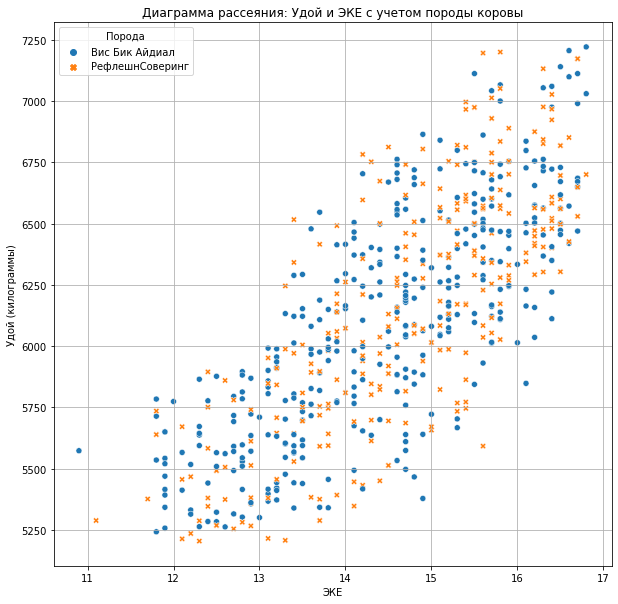

In [53]:
sns.scatterplot(data=ferma, x='ЭКЕ', y='удой', hue='порода', style='порода')
plt.title('Диаграмма рассеяния: Удой и ЭКЕ с учетом породы коровы')
plt.xlabel('ЭКЕ')
plt.ylabel('Удой (килограммы)')
plt.legend(title='Порода') 
plt.grid(True)
plt.show()

In [54]:
# Данные немного смещены (в виде параболлы). 
# Для увеличения эффективности возведем ЭКЕ в квадрат (формула параболлы y=x^2)
ferma['ЭКЕх2'] = ferma['ЭКЕ'] ** 2 

In [55]:
ferma.head()

,удой,ЭКЕ,сырой_протеин,СПО,порода,пастбище,порода_папы,жирность,белок,вкус_молока,возраст,имя_папы,СПО_бинар,ЭКЕх2
0,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64
1,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00
3,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84


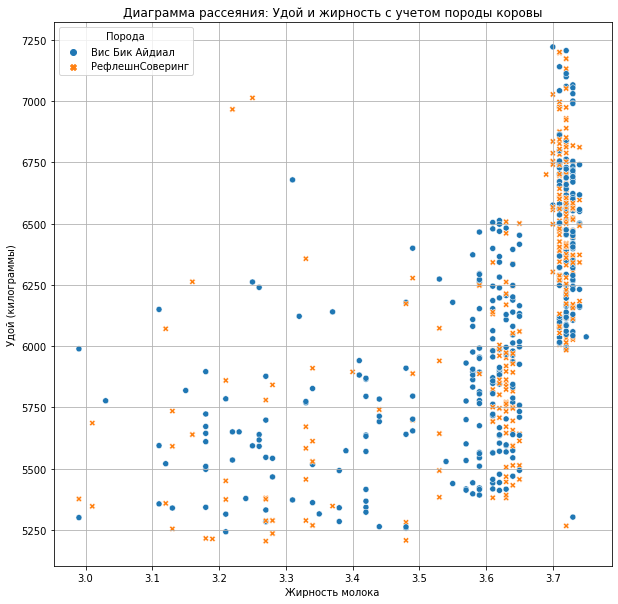

In [56]:
sns.scatterplot(data=ferma, x='жирность', y='удой', hue='порода', style='порода')
plt.title('Диаграмма рассеяния: Удой и жирность с учетом породы коровы')
plt.xlabel('Жирность молока')
plt.ylabel('Удой (килограммы)')
plt.legend(title='Порода') 
plt.grid(True)
plt.show()

In [57]:
# Данные сгрупированны 3-мя кластерами. 
# Учитывая это заданим следующие признаки
# Жирность <= 3.5 - низкая
# 3.5 < Жирность < 3.7 - среднаяя
# Жирность >= 3.68 - высокая

def fat(df, fat_col, category_col):
    '''Функция категоризирует жирность в отдельном (новом) столбце'''
    df[category_col] = "средняя"
    df.loc[df[fat_col] <= 3.5, category_col] = "низкая"
    df.loc[df[fat_col] >= 3.68, category_col] = "высокая"
    return df

In [58]:
ferma = fat(ferma, 'жирность', "категория_жирности")

In [59]:
ferma.head()

,удой,ЭКЕ,сырой_протеин,СПО,порода,пастбище,порода_папы,жирность,белок,вкус_молока,возраст,имя_папы,СПО_бинар,ЭКЕх2,категория_жирности
0,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64,средняя
1,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84,средняя
2,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00,средняя
3,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76,низкая
4,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84,высокая


<AxesSubplot:>

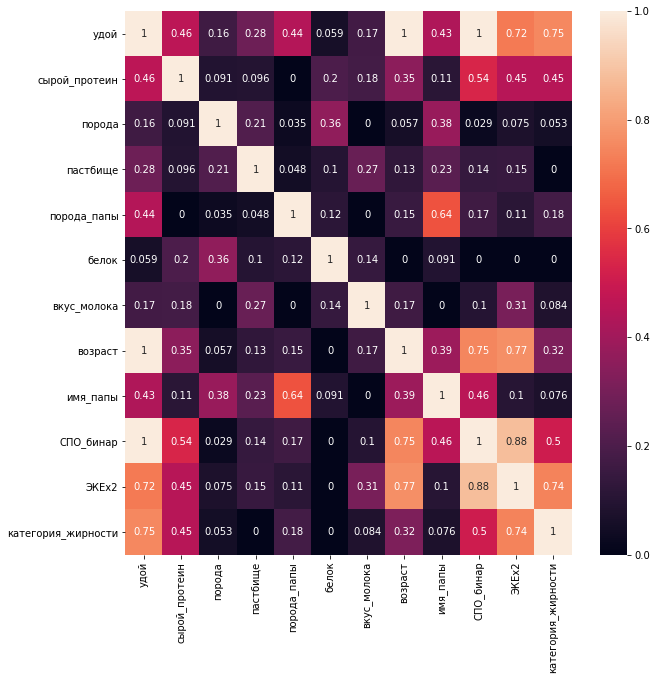

In [60]:
# Проверим как изменилась Phi_K матрица
check_phik = ferma.drop(['СПО', "ЭКЕ", "жирность"], axis=1)
interval_cols = check_phik.select_dtypes(include=['int64', 'float64']).columns.tolist()

new_matrix = check_phik.phik_matrix(interval_cols=interval_cols)

sns.heatmap(new_matrix, annot=True)

### Общие выводы: 

**В ходе корреляционного анализа было выявлено, что показатели связаны не линейно**

**С целью увеличения корреляции между показателями:**

    1. Показатель СПО был переведен в бинарный. 
    2. Показатель ЭКЕ был возведен в квадрат. 
    3. Показателю жирность были присвоены категории в зависимости от жирности.

## 5. Обучение модели линейной регрессии

### 5.1 Модель №1

In [64]:
def return_model(X,y):
    '''Функция возвращает модель МО'''
    #разбивка на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split( 
                                    X,
                                    y,
                                    random_state=42
                                    )
    
        
    #кодировка качественных признаков
    OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_encoded = OHE.fit_transform(X_train.select_dtypes(include=['object'])) 
    X_test_encoded = OHE.transform(X_test.select_dtypes(include=['object'])) 
    
    #масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number])) 
    X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number])) 
    
    #объединение данных
    X_train_conc = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
    X_test_conc = np.concatenate([X_test_encoded, X_test_scaled], axis=1)
    
      
   
    #Обучение модели
    model = LinearRegression()
    model.fit(X_train_conc, y_train)
    y_pred = model.predict(X_test_conc)
    
    
    # Возвращаем обученную модель
    return model, scaler, OHE
    

In [65]:
def make_prediction (model,scaler, OHE, new_data):
    '''Функция предсказывает показатели удоя'''
    # Преобразование новых данных
    new_data_encoded = OHE.transform(new_data.select_dtypes(include=['object']))
    new_data_numeric_scaled = scaler.transform(new_data.select_dtypes(include=[np.number]))
    
    # Объединение преобразованных признаков
    new_data_prepared = np.concatenate([new_data_numeric_scaled, new_data_encoded], axis=1)
    
    # Предсказание
    predictions = model.predict(new_data_prepared)
    
    return predictions

In [66]:
def r_and_residuals(X,y):
    '''Функция принимает независимые признаки (X) и целевой (y)
        и возвращает коэф. детерминации и визуализацию остатков
        А так же рассчитывает показатели MAE, MSE, RMSE'''
    
    
    #разбивка на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split( 
                                    X,
                                    y,
                                    random_state=42
                                    )
    
        
    #кодировка качественных признаков
    OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_encoded = OHE.fit_transform(X_train.select_dtypes(include=['object'])) 
    X_test_encoded = OHE.transform(X_test.select_dtypes(include=['object'])) 
    
    #масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number])) 
    X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number])) 
    
    #объединение данных
    X_train_conc = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
    X_test_conc = np.concatenate([X_test_encoded, X_test_scaled], axis=1)
    
      
   
    #Обучение модели
    model = LinearRegression()
    model.fit(X_train_conc, y_train)
    y_pred = model.predict(X_test_conc)
                 
    
    r2 = r2_score(y_test, y_pred)
    print(f'Значение R² модели: {r2}')
    
    #вывод разбивки выборки
    X_line_rat = (X_train.shape[0]) / (X_test.shape[0])
    X_col_rat = (X_train.shape[1]) / (X_test.shape[1])
    
    
    print(f'соотношение строк train/test = {X_line_rat}')
    print(f'соотношение столбцов train/test = {X_col_rat}')
    
    #Рассчет MAE, MSE, RMSE
    # Расчет MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')
    
    # Расчет MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}')

    # Расчет RMSE
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    
    #Анализ остатков
    residuals = y_test - y_pred
    lower_quantile = np.quantile(residuals, 0.25)
    upper_quantile = np.quantile(residuals, 0.75)
    print(f'Нижний квартиль остатков: {lower_quantile}')
    print(f'Верхний квартиль остатков: {upper_quantile}')
    
    #Scatterplor остатков
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Анализ дисперсии')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.show()
    
    #Гистограмма распределения
    bins = int(np.log2(len(residuals)) + 1)
    plt.hist(residuals, bins=bins)
    plt.title('Гистограмма распределения остатков')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.show()

   

    

**Для обучения модели были выбраны данные до улучшения. Показатели самого молока (жирность, белок) не учитываются, так как на них влияют кормовые показатели**

In [67]:
ferma.columns

Index(['удой', 'ЭКЕ', 'сырой_протеин', 'СПО', 'порода', 'пастбище',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст',
       'имя_папы', 'СПО_бинар', 'ЭКЕх2', 'категория_жирности'],
      dtype='object')

In [68]:
#выбор независимых и зависимой переменных
X1 = ferma.drop(['удой', "имя_папы","вкус_молока", "белок", "жирность", "ЭКЕх2", "СПО_бинар", 'категория_жирности'], axis=1)
y1 = ferma['удой']


Значение R² модели: 0.804452494482198
соотношение строк train/test = 3.0
соотношение столбцов train/test = 1.0
MAE: 156.7324840764331
MSE: 39806.62101910828
RMSE: 199.51596682749047
Нижний квартиль остатков: -157.5
Верхний квартиль остатков: 89.5


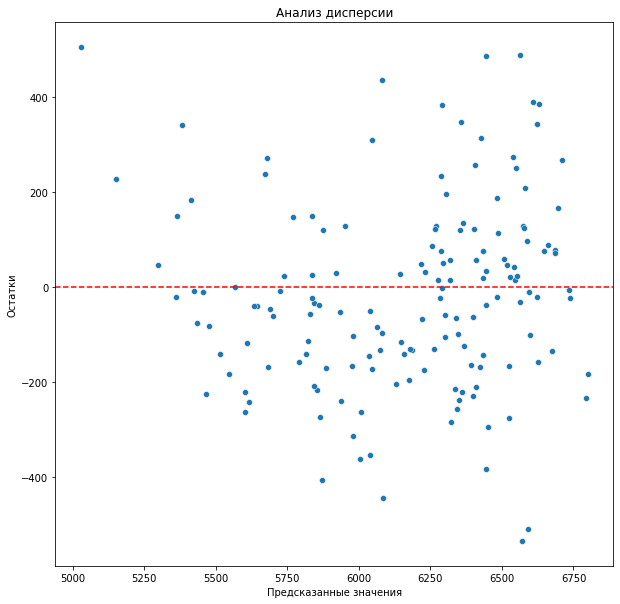

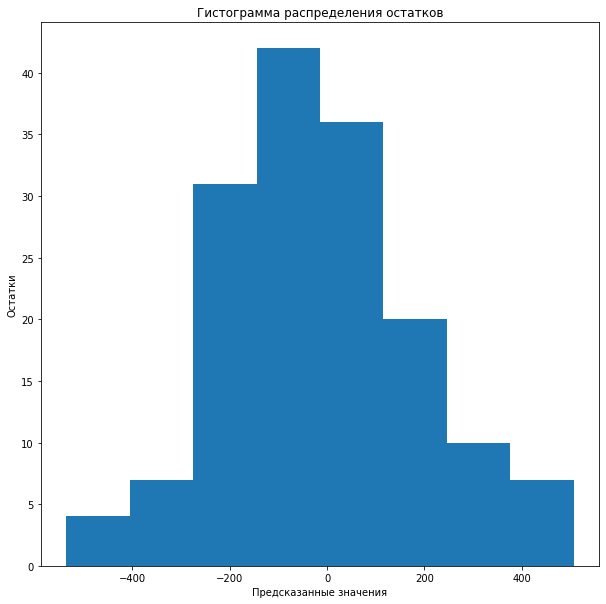

In [69]:
first_model = r_and_residuals(X1,y1)

#### Вывод по модели 1:

**Значение R2 модели говорит о том, что около 80,45% вариации целевой переменной может быть объяснено выбранными предикторами.**

**Интервал основной массы остатков лежит в диапазоне [-157.50:89.5]**

**Возможны несколько причин уровня R2:** 
 1) *не учтены нелинейные связи*
 
 2) *не достаточно данных*

**MAE = 156.73**

**MSE = 39 806.62**

**RMSE = 199.52**



### 5.2 Модель №2

**Построим модель, похожую на 1, но с "улучшенными" показателями**

In [70]:
ferma.columns

Index(['удой', 'ЭКЕ', 'сырой_протеин', 'СПО', 'порода', 'пастбище',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст',
       'имя_папы', 'СПО_бинар', 'ЭКЕх2', 'категория_жирности'],
      dtype='object')

In [71]:
#выбор независимых и зависимой переменных
X2 = ferma.drop(['удой', "имя_папы","вкус_молока", "белок", "жирность", "ЭКЕ", "СПО", 'жирность'], axis=1)
y2 = ferma['удой']

Значение R² модели: 0.825029661916663
соотношение строк train/test = 3.0
соотношение столбцов train/test = 1.0
MAE: 144.37221927069152
MSE: 35617.830660767875
RMSE: 188.72686788257752
Нижний квартиль остатков: -125.34396316819857
Верхний квартиль остатков: 93.22503881122793


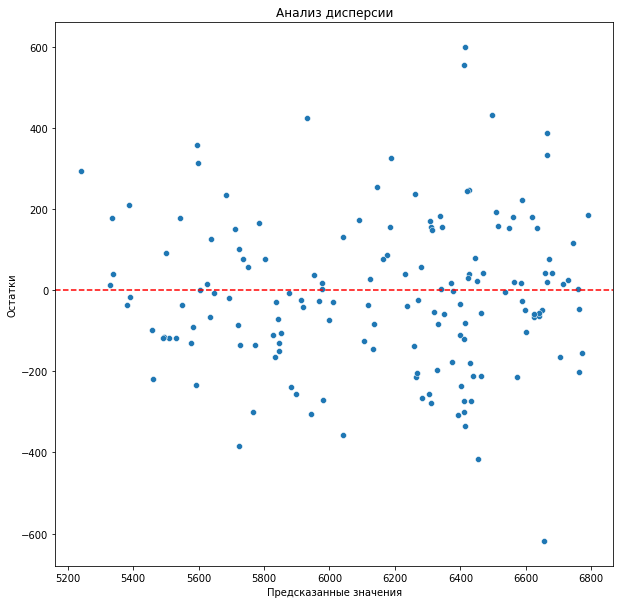

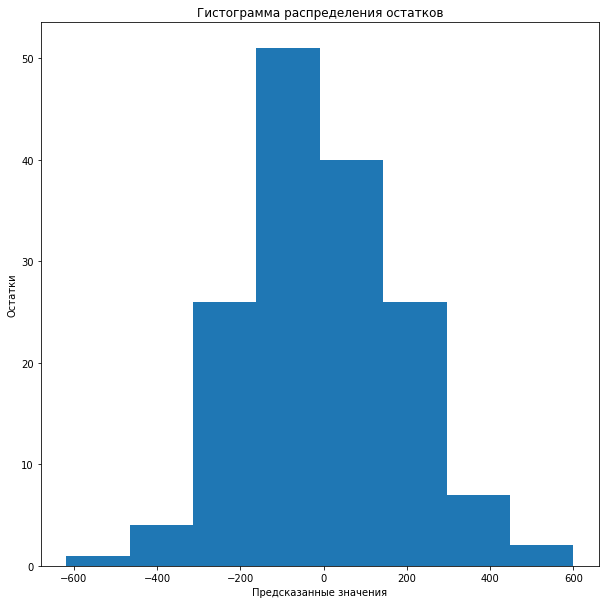

In [72]:
second_model = r_and_residuals(X2,y2)

####  Вывод по модели 2:

**Коэффициент детерминается незначительно улучшился и теперь составляет 82,50%**

**Основной разброс диапозона остатков немного сократился и составляет [-125.34:93.23]**

**Показатели MAE,MSE,RMSE улучшились:**

**MAE = 144.37**

**MSE = 35 617.83**

**RMSE = 188.73**



### 5.3 Модель №3

**Модель, похожая на модель №2, но с добавлением признака имя папы быка"**

In [73]:
#выбор независимых и зависимой переменных
X3 = ferma.drop(['удой', "вкус_молока", "белок", "жирность", "ЭКЕ", "СПО", 'жирность'], axis=1)
y3 = ferma['удой']

Значение R² модели: 0.8162464553040593
соотношение строк train/test = 3.0
соотношение столбцов train/test = 1.0
MAE: 150.76874357632494
MSE: 37405.7838030728
RMSE: 193.4057491468979
Нижний квартиль остатков: -137.17997057722823
Верхний квартиль остатков: 136.4612470916927


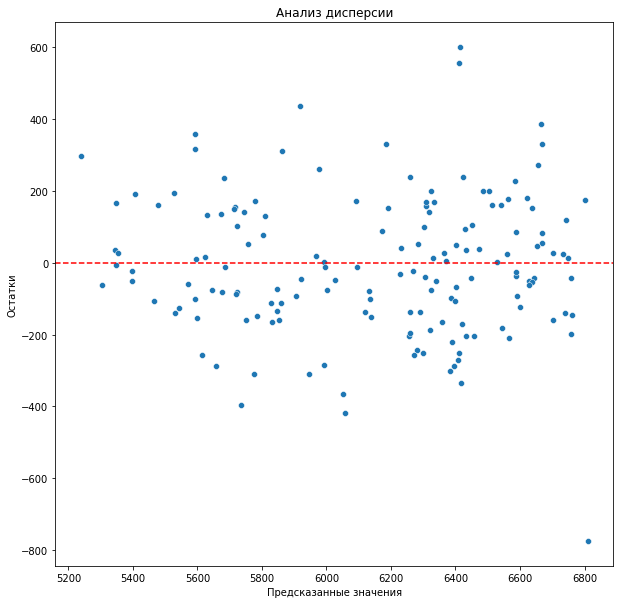

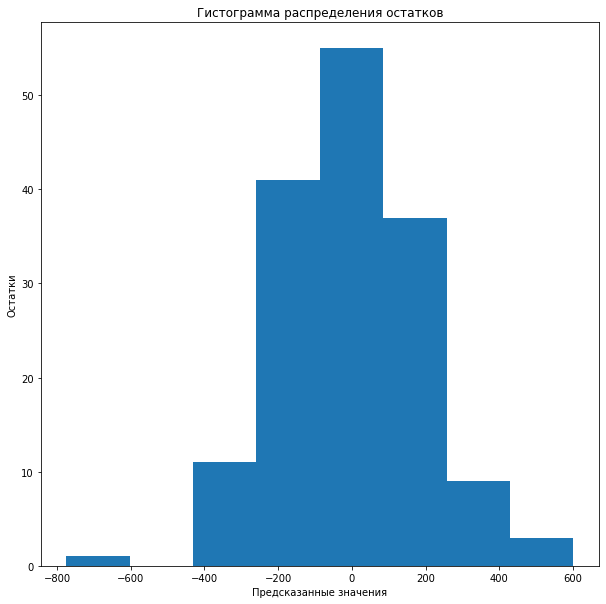

In [74]:
third_model = r_and_residuals(X3, y3)

#### Вывод по модели 3:

**Третья модель показала себя хуже, чем вторая**

**Коэф. детерминации снизился до 81.62**

**Диапозон остатков расширился [-137.18:136.46], при этом появился остаток с самым высоким расхождением (около - 800)**

**Показатели MAE, MSE, RMSE также ухудшились:**

**MAE = 150.77**

**MSE = 37405.78**

**RMSE = 193.41**


### 5.4 Прогноз удоя

**Учитывая показатели, для получения прогноза по удою, было принято решение использовать вторую модель**

In [75]:
X2.head()

,сырой_протеин,порода,пастбище,порода_папы,возраст,СПО_бинар,ЭКЕх2,категория_жирности
0,1743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,201.64,средняя
1,2138,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84,средняя
2,1854,РефлешнСоверинг,холмистое,Соверин,более_2_лет,0,196.00,средняя
3,2012,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,0,153.76,низкая
4,1675,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84,высокая


In [76]:
#Преобразование данных, в соответствии с условиями
shop['СПО'] = (ferma['СПО'].mean()) * 1.05 
shop['ЭКЕ'] = (ferma['ЭКЕ'].mean()) * 1.05 
shop['сырой_протеин'] = (ferma['сырой_протеин'].mean()) * 1.05 

In [77]:
#Преобразования, как в модели №2
shop_lin = shop.copy()
shop_lin['СПО'] = (shop_lin['СПО'] > 0.92).astype(int)
shop_lin['ЭКЕ'] = shop_lin['ЭКЕ'] ** 2
shop_lin = fat(shop_lin, 'жирность', "категория_жирности")
shop_lin = shop_lin.drop(['жирность', 'имя_папы', 'белок'], axis=1)

In [78]:
shop_lin.head()

,порода,пастбище,порода_папы,возраст,СПО,ЭКЕ,сырой_протеин,категория_жирности
0,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,1,233.361138,2019.947532,средняя
1,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,1,233.361138,2019.947532,средняя
2,РефлешнСоверинг,равнинное,Соверин,более_2_лет,1,233.361138,2019.947532,средняя
3,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,1,233.361138,2019.947532,низкая
4,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,1,233.361138,2019.947532,средняя


In [79]:
#Оставляем столбцы как в модели 2
shop_lin = shop_lin[['сырой_протеин', "порода", "пастбище", "порода_папы", "возраст", "СПО", "ЭКЕ", "категория_жирности"]]

In [80]:
# возвращаем данные лучшей модели
model, scaler, OHE = return_model(X2, y2)
# делаем предсказание
predictions = make_prediction(model, scaler, OHE, shop_lin)

In [81]:
udoi = pd.DataFrame(predictions, columns=['Удой(предсказанный)'])


In [82]:
shop['удой_предсказанный'] = udoi 

In [83]:
shop

,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст,СПО,ЭКЕ,сырой_протеин,удой_предсказанный
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6038.668926
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6250.414014
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6343.885998
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6134.190576
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6280.742982
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,6357.524208
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6038.668926
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,6236.775805
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6343.885998
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,6147.828786


### Общий вывод:

**На основании коэффициента детерминации, а также показателей MSE, RMSE, MAE выбрана наилучшая модель(в данном случае, модель №2)**

**С помощью модели сделан прогноз целевых показателей удоя**

**На текущий момент, только корова с id=12 не соответствует целевым показателям удой > 6000.00 кг/год**

## 6 Обучение модели логистической регрессии

### 6.1 Выбор показателей для модели

In [85]:
shop.head(1)

,порода,пастбище,порода_папы,имя_папы,жирность,белок,возраст,СПО,ЭКЕ,сырой_протеин,удой_предсказанный
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6038.668926


In [86]:
ferma.head(1)

,удой,ЭКЕ,сырой_протеин,СПО,порода,пастбище,порода_папы,жирность,белок,вкус_молока,возраст,имя_папы,СПО_бинар,ЭКЕх2,категория_жирности
0,5863,14.2,1743,0.89,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64,средняя


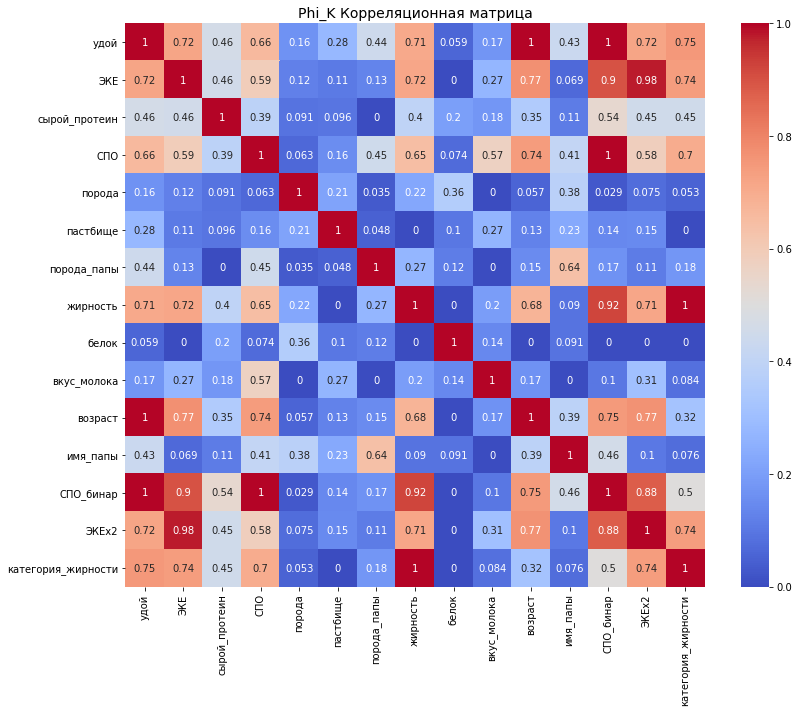

In [87]:
# Вычисление матрицы корреляции с использованием phik
interval= ferma.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix_vkus = ferma.phik_matrix(
    interval_cols=interval)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_vkus, cmap='coolwarm', annot=True)
            
plt.title("Phi_K Корреляционная матрица", fontsize=14)
plt.tight_layout()
plt.show()


#### Вывод по выбору показателей:

**Основываясь на Phi_K матрице оставим показатели связанные со вкусом молока.**

**Исключим нулевые связи, а также ЭКЕ (ЭКЕх2 сильнее связан), СПО бинарный (обычный СПО обладает самой большой связью из всех показателей), категорию жирности (некатегоризированная жирность коррелирует лучше)**

### 6.2 Подготовка данных и обучение модели

In [88]:
ferma_log = ferma.drop(['ЭКЕ', "СПО_бинар", "категория_жирности", "порода", "порода_папы", "имя_папы"], axis=1)

In [89]:
ferma_log.head()

,удой,сырой_протеин,СПО,пастбище,жирность,белок,вкус_молока,возраст,ЭКЕх2
0,5863,1743,0.890,равнинное,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,2138,0.890,равнинное,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,1854,0.885,холмистое,3.59,3.074,не вкусно,более_2_лет,196.00
3,5895,2012,0.885,холмистое,3.40,3.075,не вкусно,более_2_лет,153.76
4,5302,1675,0.885,равнинное,3.73,3.073,вкусно,менее_2_лет,163.84


In [95]:
label_encoder = LabelEncoder()

In [97]:
#Создадим независимые переменные и целевой признак
#Закодируем целевой признак
X_milk = ferma_log.drop('вкус_молока', axis=1)
y_milk = label_encoder.fit_transform(ferma_log['вкус_молока'])

In [98]:
ferma_log.head(3)

,удой,сырой_протеин,СПО,пастбище,жирность,белок,вкус_молока,возраст,ЭКЕх2
0,5863,1743,0.890,равнинное,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,2138,0.890,равнинное,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,1854,0.885,холмистое,3.59,3.074,не вкусно,более_2_лет,196.00


**Учитывая, что мы удаляли первое полученный столбец(молоко вкусное), значение вкусного молока принимает значение 0, а невкусного - 1**

In [ ]:
#построим модель логической регрессии

#объявляем константы 
RANDOM_STATE = 42

#разбивка на тренировочную и тестовую выборки
X_train_milk, X_test_milk, y_train_milk, y_test_milk = train_test_split( 
                                    X_milk,
                                    ,
                                    random_state=RANDOM_STATE
                                    )

#масштабирование 
log_scaler = StandardScaler()
X_train_milk_scaled = log_scaler.fit_transform(X_train_milk.select_dtypes(include=[np.number]))
X_test_milk_scaled = log_scaler.transform(X_test_milk.select_dtypes(include=[np.number]))

#кодирование

ohe=OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_milk_encoded = ohe.fit_transform(X_train_milk.select_dtypes(include=['object']))
X_test_milk_encoded = ohe.transform(X_test_milk.select_dtypes(include=['object']))

#объединение данных
X_train_milk_prep = np.concatenate([X_train_milk_scaled, X_train_milk_encoded], axis=1)
X_test_milk_prep = np.concatenate([X_test_milk_scaled, X_test_milk_encoded], axis=1)

#обучение 
clf = LogisticRegression()
clf = clf.fit(X_train_milk_prep, y_train_milk)

#прогноз
y_pred_milk = clf.predict(X_test_milk_prep)

#метрики
accuracy = accuracy_score(y_test_milk, y_pred_milk)
recall = recall_score(y_test_milk, y_pred_milk)
precision = precision_score(y_test_milk, y_pred_milk)

print('accuracy: ',round(accuracy ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

#матрица ошибок
cm = confusion_matrix(y_test_milk, y_pred_milk)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

**В нашем случае модель предсказывает правильно, вкусное молоко в 66%**

**При этом для нас важнее исключить ошибку 1-го рода**

**Отвечаюший за это показатель precision на уровне 71%**

In [ ]:
# Обучаем логистическую регрессию
clf.fit(X_train_milk_prep, y_train_milk)

# Получаем вероятности предсказания
y_probs = clf.predict_proba(X_test_milk_prep)[:, 1]

# Устанавливаем новый порог
threshold = 0.73
y_pred_new = np.where(y_probs >= threshold, 1, 0)

# Оцениваем результат
print(confusion_matrix(y_test_milk, y_pred_new))
print(precision_score(y_test_milk, y_pred_new))

**Был подобран порог в 0,73, при котором показатель precision = 1 и не возникает ошибок 1го рода**

In [ ]:
display(X_train_milk.head(1))
display(shop.head(1))
print(X_train_milk.columns)

In [ ]:
# подготовим ДФ к обучению
shop_log = shop.copy()
shop_log = shop_log.drop(['порода', "порода_папы", "имя_папы"], axis=1)
shop_log['ЭКЕ'] = shop_log['ЭКЕ'] ** 2
shop_log = shop_log[['удой_предсказанный', 'сырой_протеин', 'СПО', 'пастбище', 'жирность', 'белок', 'возраст', 'ЭКЕ']]
shop_log.head(1)

In [ ]:
# делаем прогноз с учетом нового порога классификации

# кодируем новые данные
shop_log_enc = ohe.transform(shop_log.select_dtypes(include=['object']))

# масштабируем 
shop_log_scaled = log_scaler.transform(shop_log.select_dtypes(include=[np.number]))
# объединяем
shop_log_prep = np.concatenate([shop_log_enc, shop_log_scaled], axis=1)
y_proba_new = clf.predict_proba(shop_log_prep)[:, 1]

y_pred_correct = (y_proba_new >= threshold).astype(int)

In [ ]:
delicious_milk = pd.DataFrame(y_pred_correct, columns=['вкус молока'])



In [ ]:
    # добавляем в дф shop данные по предсказанию
shop['вкус'] = delicious_milk


In [ ]:
shop

## Общие выводы:

**Модель обучена. Предсказания получены таким образом, что вкусное молоко (1), точно окажется вкусным**

## Итоговые выводы

In [ ]:
# итоговый дф к покупке 
display(shop)

In [ ]:
# коровы удовлетворяющие запросу (удой > 6000кг., вкусное молоко)
to_buy = shop.query('удой_предсказанный > 6000 & вкус == 1')
to_buy

### Выводы по работе 

1. **Фермер может купить три корову, удовлетворяющую запросу, потому что вкус молока со 100% вероятностью ему понравится только у нее**

2. **Я бы рекомендовал фермеру провести опрос среди покупателей, касательно вкуса молока и составить данные, основанные на более четком сборе информации. На текущий момент у фермера в стаде более 600 коров, и ему нравится только около 60% молока.**

3. **В данной работе для улучшения линейной модели регрессии, для улучшения показателей не связанны в квадрат и присваил порог для перевода** 